<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Lesson_4_CNN_Pro_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Neural Network 
Used mainly for image processing
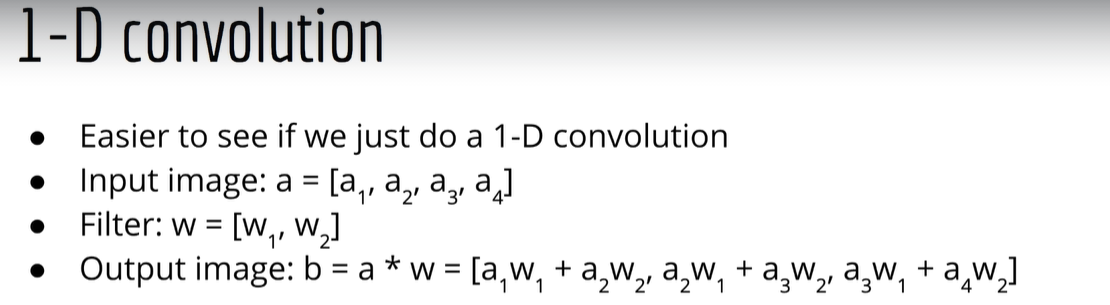

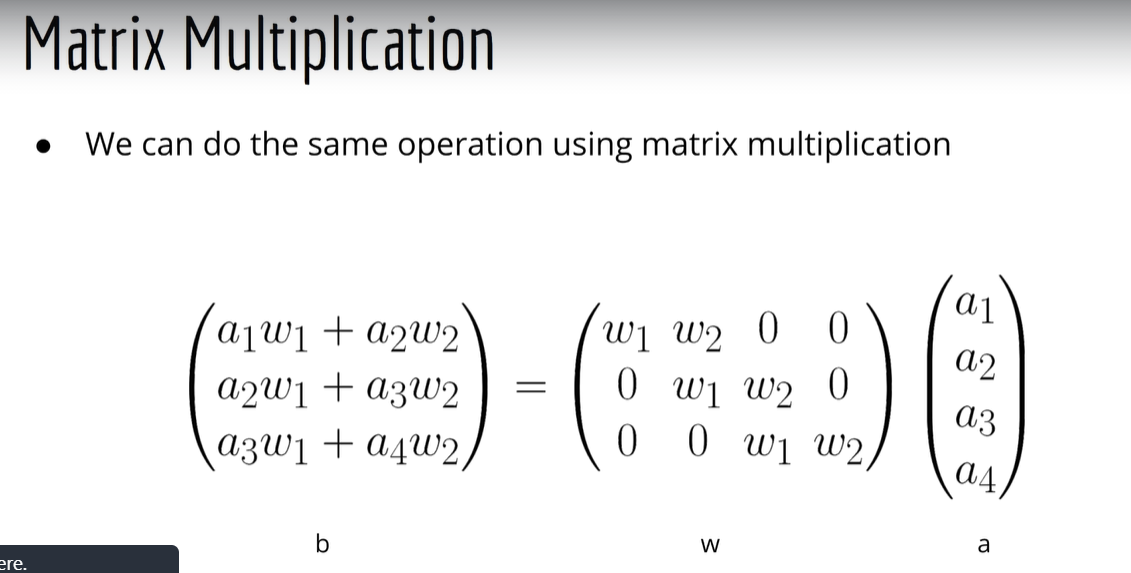

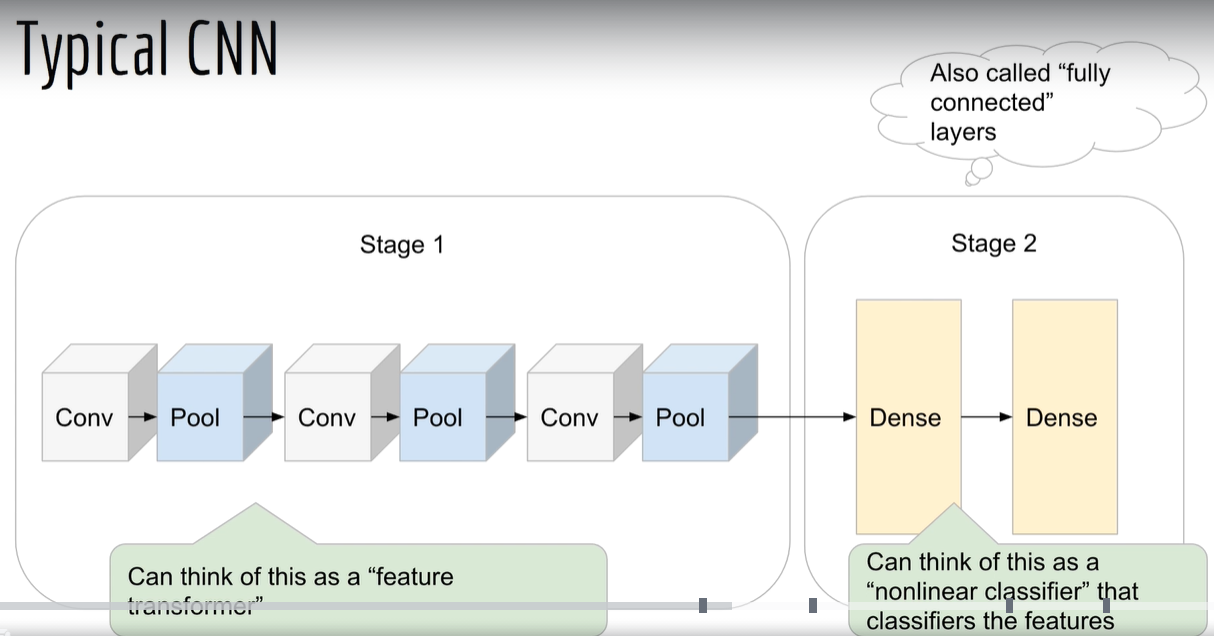

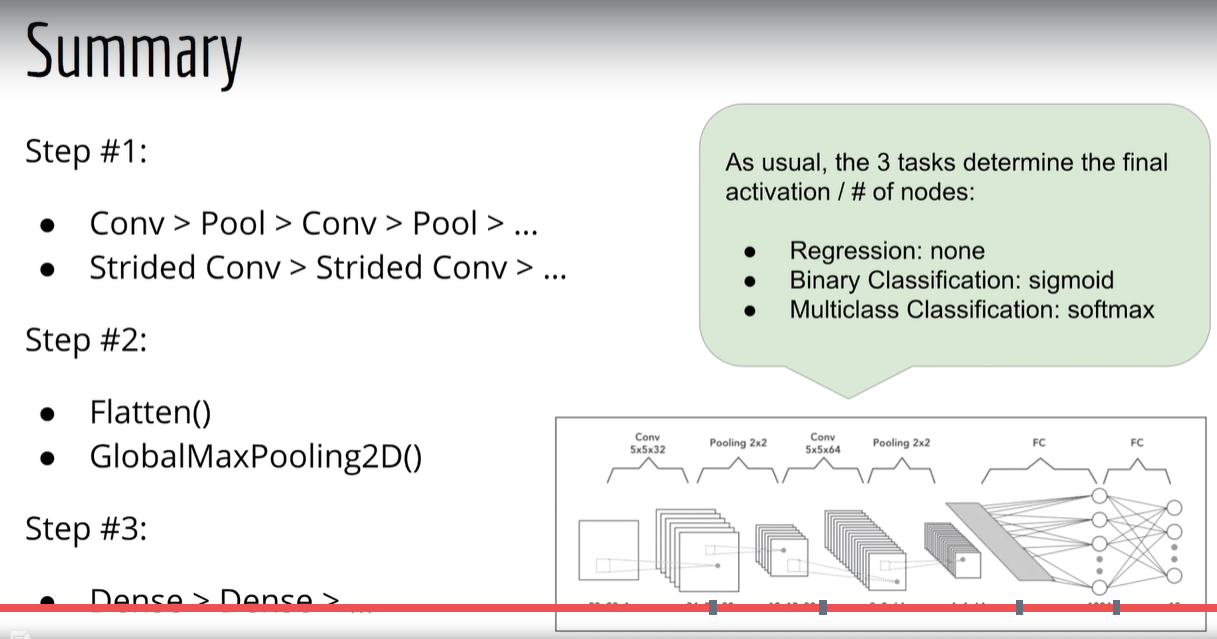

### Project: Fashion MNIST and CIFAR-10 database

#### Fashion MNIST

In [93]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [22]:
dataset, dataset_info = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWKGRHM/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWKGRHM/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [23]:
# Check that dataset is a dictionary
print('dataset has type:', type(dataset))

# Print the keys of the dataset dictionary
print('\nThe keys of dataset are:', list(dataset.keys()))

dataset has type: <class 'dict'>

The keys of dataset are: ['test', 'train']


In [43]:
## get the dataset size
num_training_examples = X_train.shape[0]
num_test_examples = X_test.shape[0]

In [44]:
# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

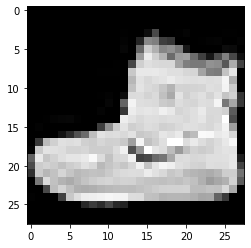

In [10]:
plt.imshow(X_train[0], cmap='gray')

In [49]:
X_train.shape

(60000, 28, 28)

In [77]:
# number of categories
k = np.unique(y_train).shape[0]

In [95]:
## preprocessing the images
processed_train = X_train.reshape((-1,28,28,1))/np.max(X_train[0])
processed_test = X_test.reshape((-1,28,28,1))/np.max(X_test[0])
print(processed_train.shape), 
print(processed_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [133]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [134]:
## set up the model

i = Input(shape = processed_train[0].shape)
x = Conv2D(32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(64, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D(128, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2) (x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2) (x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

# model summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [135]:
# compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [117]:
# model evaluation
model.evaluate(processed_train, y_train.reshape(-1))

1875/1875 [==============================] - 9s 5ms/step - loss: 2.2978 - accuracy: 0.1234


[2.297775983810425, 0.12338333576917648]

In [136]:
# model tunning
EPOCHS = 15
history = model.fit(processed_train, y_train, validation_data=(processed_test, y_test), epochs=EPOCHS)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5260 - accuracy: 0.8057 - val_loss: 0.4090 - val_accuracy: 0.8460
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3556 - accuracy: 0.8665 - val_loss: 0.3577 - val_accuracy: 0.8689
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3046 - accuracy: 0.8856 - val_loss: 0.3119 - val_accuracy: 0.8853
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2681 - accuracy: 0.8992 - val_loss: 0.3201 - val_accuracy: 0.8836
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2382 - accuracy: 0.9094 - val_loss: 0.3069 - val_accuracy: 0.8928
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2167 - accuracy: 0.9184 - val_loss: 0.3257 - val_accuracy: 0.8916
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1951 - accuracy: 0.9271 - val_loss: 0.3095 -

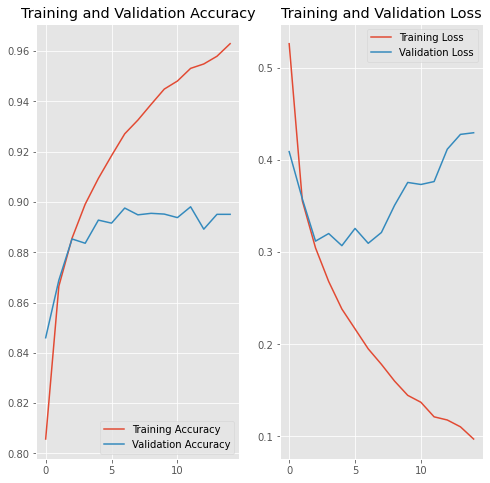

In [167]:
# plot the accuracy and loss function
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Confusion matrix, without normalization
[[877   0  20  22   1   1  75   0   4   0]
 [  1 972   1  17   3   0   2   0   4   0]
 [ 24   0 838  10  50   0  77   0   1   0]
 [ 11   5  18 911  29   0  24   0   2   0]
 [  4   0  74  24 819   0  74   0   5   0]
 [  1   0   0   1   0 969   0  16   3  10]
 [152   0  65  30  73   0 671   0   9   0]
 [  1   0   0   0   0  21   0 936   1  41]
 [  5   0   3   5   2   1   4   1 978   1]
 [  1   0   0   0   0   1   0  18   0 980]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


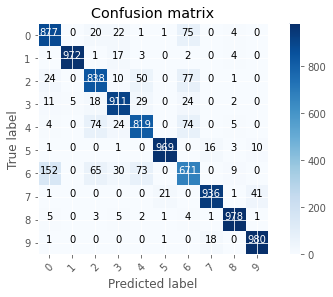

In [138]:
# Plot confusion matrix
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  ax = plt.axes()
  ax.set(xlabel='Predicted label', ylabel='True label')
  plt.show()


p_test = model.predict(processed_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: Sneaker but Predicted: Ankle boot')

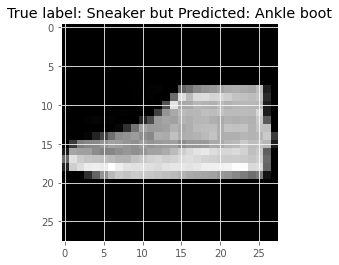

In [164]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s but Predicted: %s" % (class_names[y_test[i]], class_names[p_test[i]]))

### CIFAR database

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step
